# Feature Engineering
***

TASK: find which MACs are the most usefull for location<br>

Principle Component Analysis, Linear Discriminant  Analysis...<br>

pip install --upgrade google-cloud-firestore<br>
pip install gcloud<br>

Esto no parece ayudar:<br>
Download and install Google Cloud SDK    https://cloud.google.com/sdk/docs/quickstart-windows<br>
c:\> gcloud init<br>

Ve a la consola de google y crea una cuenta de servicio<br>
https://cloud.google.com/storage/docs/authentication#generating-a-private-key<br>
    Descarca el json y utilizalo como se muestra a continuación<br>

In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "Puestos-b0665827b03a.json"

In [2]:
from google.cloud import firestore
db = firestore.Client()

In [3]:
import pandas as pd

In [4]:
# Descargar datos de firestore y guardarlos en pandas DataFrame

# Conexion
ann = db.collection(u'ann')
ptos = ann.get()

lista = []
for pto in ptos:
    x = pto.get('pos').longitude
    y = pto.get('pos').latitude
    
    columnas = {'x': x, 'y': y}
    for mac in pto.get('wifi'):
        columnas[mac.get('bssid')] = mac.get('level')
    
    lista.append(columnas)

###
datos = pd.DataFrame(lista)
x_data = datos.drop(labels=['x', 'y'], axis=1)
etiquetas = datos.columns.get_values().tolist()
for a in ['x', 'y']:
    etiquetas.remove(a)
y_data = datos.drop(labels=etiquetas, axis=1)


In [5]:
#Coge solo las que no tienen nulos
print("Nulos en las macs disponibles:")
import operator
sorted(x_data.isnull().sum().items(), key=operator.itemgetter(1))

Nulos en las macs disponibles:


[('24:1f:a0:dc:7f:ff', 0),
 ('44:e4:d9:00:76:40', 0),
 ('44:e4:d9:00:76:41', 0),
 ('44:e4:d9:00:76:42', 0),
 ('44:e4:d9:00:76:44', 0),
 ('58:35:d9:64:58:80', 0),
 ('58:35:d9:64:58:83', 0),
 ('58:35:d9:64:58:84', 0),
 ('58:35:d9:64:58:87', 0),
 ('58:35:d9:64:5b:10', 0),
 ('58:35:d9:64:5b:12', 0),
 ('64:d9:89:99:8d:e0', 0),
 ('44:e4:d9:00:76:43', 1),
 ('44:e4:d9:00:76:47', 1),
 ('58:35:d9:64:58:82', 2),
 ('58:35:d9:64:5b:14', 2),
 ('58:35:d9:64:58:81', 3),
 ('64:d9:89:99:8d:e4', 3),
 ('64:d9:89:99:8d:e7', 3),
 ('64:d9:89:99:8d:e1', 4),
 ('64:d9:89:99:8d:e2', 4),
 ('58:35:d9:64:5b:11', 5),
 ('58:35:d9:64:5b:13', 5),
 ('58:35:d9:64:5b:17', 6),
 ('78:40:e4:93:1d:67', 9),
 ('88:44:77:13:06:a7', 9),
 ('da:c4:6a:ce:1b:34', 10),
 ('f0:ee:10:43:6d:94', 10),
 ('64:d9:89:99:8d:e3', 11),
 ('c0:62:6b:8e:96:b0', 11),
 ('c0:62:6b:8e:96:b7', 11),
 ('c0:62:6b:8e:96:b1', 12),
 ('c0:62:6b:8e:96:b4', 12),
 ('c0:62:6b:8e:96:b2', 13),
 ('c0:62:6b:8e:96:b3', 13),
 ('e8:ba:70:92:67:10', 13),
 ('e8:ba:70:92:67:

In [6]:
#Usados hasta ahora
macs_old = [
    "24:1f:a0:dc:7f:ff",  #0
    "58:35:d9:64:58:80",  #0
    "58:35:d9:64:58:83",  #0
    "58:35:d9:64:58:82",  #2 nulos
    "58:35:d9:64:58:87",  #0
    "64:d9:89:99:8d:e3",  #11 nulos
    "44:e4:d9:00:76:41",  #0
    "44:e4:d9:00:76:40",  #0
    "64:d9:89:c4:0d:63",  #20 nulos
    "44:e4:d9:00:76:47"]  #1 nulo

print("Nulos en las macs usadas hasta ahora:")
for i in macs_old:
    print(x_data[i].isnull().sum())
    
        #--> Probar con los que menos NULL tienen: WI0, WI1, WI2, WI4, WI6, WI7

Nulos en las macs usadas hasta ahora:
0
0
0
2
0
11
0
0
20
1


In [7]:
datos = pd.read_csv('datos.csv')

datos.sample(frac=1)

x_data = datos.drop(labels=['PTO_X', 'PTO_Y'], axis=1)
y_data = datos.drop(['WI0', 'WI1', 'WI2', 'WI3', 'WI4', 'WI5', 'WI6', 'WI7', 'WI8', 'WI9'], axis=1)

mejores = {}
macs_old = ['WI0', 'WI1', 'WI2', 'WI3', 'WI4', 'WI5', 'WI6', 'WI7', 'WI8', 'WI9']
for i in macs_old:
    count = 0
    for j in x_data[i]:
        if(j == -99):
            count += 1
    mejores[i] = count
    #print(i, " --> ", count)
    
sorted(mejores.items(), key=operator.itemgetter(1))
    
#--> Probar con los que menos -99 tienen: WI0, WI1, WI3, WI4, WI5, WI7

[('WI0', 71),
 ('WI7', 190),
 ('WI1', 284),
 ('WI3', 285),
 ('WI5', 293),
 ('WI4', 294),
 ('WI6', 310),
 ('WI2', 330),
 ('WI9', 360),
 ('WI8', 1281)]

TEST: Buscar un modelo que funcione limitando las entradas a las que tienen menos valores nulos:

        WI0, WI1, WI3, WI4, WI5, WI7
        

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split #pip install -U scikit-learn
from sklearn.preprocessing import MinMaxScaler

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

import time

Using TensorFlow backend.


In [9]:
import winsound
def beep():
    duration = 500  # millisecond
    freq = 900  # Hz
    winsound.Beep(freq, duration)
    winsound.Beep(freq, duration)
    winsound.Beep(freq, 2*duration)

In [10]:
#################################################################################################
#Loading the data
datos = pd.read_csv('datos.csv')
datos = datos.sample(frac=1)#Returns a random sample of items from an axis of object.

#x_data = datos.drop(labels=['PTO_X', 'PTO_Y', 'WI3', 'WI5', 'WI8', 'WI9'], axis=1)
x_data = datos.drop(labels=['PTO_X', 'PTO_Y', 'WI2', 'WI6', 'WI8', 'WI9'], axis=1)

y_data = datos.drop(['WI0', 'WI1', 'WI2', 'WI3', 'WI4', 'WI5', 'WI6', 'WI7', 'WI8', 'WI9'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=101)

print("TRAIN DATA: ", x_train.shape)
print("TEST  DATA: ", x_test.shape)

TRAIN DATA:  (1579, 6)
TEST  DATA:  (678, 6)


In [11]:
#################################################################################################
#Normalizing the data
mean = x_train.mean(axis=0).mean()
std  = x_train.std(axis=0).std()
print("MEAN: %f,  STD DEV: %f" % (mean, std))
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

MEAN: -62.738759,  STD DEV: 2.387312


In [12]:
#################################################################################################
#ANN Model
batch_size=128
epocas=90000

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(3, activation='relu', input_shape=(x_data.shape[1],), name='cesin'))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(3, activation='relu'))
    model.add(layers.Dense(2, name='cesout'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss=losses.mse, metrics=[metrics.mae])
    return model
# 7 neuronas capa -> CES ERROR:  9.341623758504909  lr=0.0001
# 4 neuronas capa -> CES ERROR:  9.703250049616706
# 3n 3c lr=.0001 e=13700 -> CES ERROR:  14
# 3n 4c lr=.0001 e=70000 -> CES ERROR:  10.114522437225896
# 3,4,4,4,3n 5c lr=.0001 e=60000 -> 9.347698820900494

In [13]:
#################################################################################################
#Train the model  (ep: 22000)
print("INI: ", time.ctime())
model = build_model()
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=epocas, batch_size=batch_size, verbose=0)
print("END: ", time.ctime())
beep()

INI:  Wed Jan 24 13:57:13 2018
END:  Wed Jan 24 14:23:01 2018


Min error 64.479433 at epoch 70041


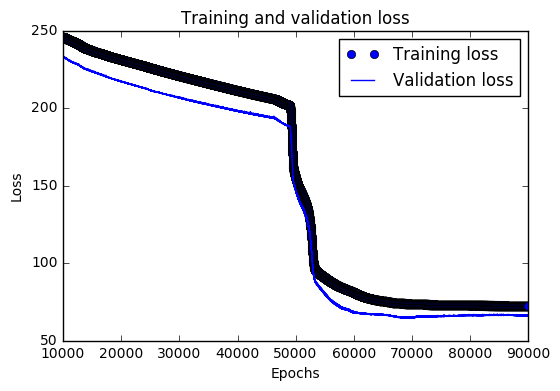

In [14]:
#################################################################################################
#Study the model
print("Min error %f at epoch %d" % (np.min(hist.history['val_loss'][:]), np.argmin(hist.history['val_loss'][:])))

offset0 = 10000
offset1 = None
loss = hist.history['loss'][offset0:offset1]
val_loss = hist.history['val_loss'][offset0:offset1]

epochs = range(offset0 + 1, len(loss) + offset0 + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
test_mae_score

678/678 [==============================] - 0s 46us/step


6.257862576341207

In [16]:
#################################################################################################
#CES error
#
def calcError(real, pred):
    error = 0.
    real0 = np.asarray(real)
    for i in range(real.shape[0]):
        error = error + np.sqrt(pow(pred[i][0] - real0[i][0], 2) + pow(pred[i][1] - real0[i][1], 2))
    return error  /  real.shape[0]

###
y_predicted = model.predict(x_test)

error = calcError(y_test, y_predicted)
print("CES ERROR: ", error)
print("\n")

###
y_test0 = np.asarray(y_test)
for i in range(1,10):
    print("---------------> Real vs Pred.: (%.0f, %.0f) vs (%.0f, %.0f)      err(%.1f, %.1f)"
          % (y_test0[i][0], y_test0[i][1], y_predicted[i][0], y_predicted[i][1],
            y_test0[i][0] - y_predicted[i][0], y_test0[i][1] - y_predicted[i][1]))
print("\n")


#TODO: Maximo error, error medio, desviacion del error...

CES ERROR:  9.884135129363818


---------------> Real vs Pred.: (64, 74) vs (68, 71)      err(-3.9, 3.0)
---------------> Real vs Pred.: (87, 35) vs (82, 43)      err(5.1, -7.7)
---------------> Real vs Pred.: (72, 86) vs (62, 81)      err(10.2, 4.3)
---------------> Real vs Pred.: (62, 43) vs (76, 37)      err(-14.4, 6.0)
---------------> Real vs Pred.: (93, 66) vs (84, 78)      err(8.2, -11.6)
---------------> Real vs Pred.: (77, 48) vs (81, 42)      err(-3.6, 5.7)
---------------> Real vs Pred.: (86, 53) vs (83, 45)      err(3.5, 8.3)
---------------> Real vs Pred.: (69, 45) vs (78, 39)      err(-9.3, 5.9)
---------------> Real vs Pred.: (79, 62) vs (78, 64)      err(1.0, -1.5)




In [17]:
#model.save("cesnet_redux_last_"+str(error)+".h5")

In [18]:
#################################################################################################
# K Fold Study
k = 3
n_samples = x_data.size // x_data.shape[1] // k

print(time.ctime())
print('Samples by fold: ', n_samples, '\n')
all_scores = []
all_hist = []
for i in range(k):
    print('processing fold #', i)

    x_valid3 = x_data[i * n_samples : (i + 1) * n_samples]
    y_valid3 = y_data[i * n_samples : (i + 1) * n_samples]
    x_data3 = np.concatenate([x_data[ : i * n_samples], x_data[(i + 1) * n_samples : ]], axis=0)
    y_data3 = np.concatenate([y_data[ : i * n_samples], y_data[(i + 1) * n_samples : ]], axis=0)

    model3 = build_model()
    hist3 = model3.fit(x_data3, y_data3, validation_data=(x_valid3, y_valid3), epochs=epocas, batch_size=batch_size, verbose=0)
    #all_hist.append(hist3.history['val_loss'])
    y_predicted = model3.predict(x_test)
    all_scores.append(calcError(y_test, y_predicted))
    all_hist.append(hist3.history['val_mean_absolute_error'])
    print(time.ctime())
    print("  Min error %f at epoch %d" % (np.min(hist3.history['val_loss'][:]), np.argmin(hist3.history['val_loss'][:])))
    
    y_predicted = model3.predict(x_test)
    print("  CES ERROR: ", calcError(y_test, y_predicted))
beep()

Wed Jan 24 14:23:05 2018
Samples by fold:  752 

processing fold # 0
Wed Jan 24 14:59:31 2018
  Min error 203.108294 at epoch 89958
  CES ERROR:  36.9303943378789
processing fold # 1
Wed Jan 24 15:25:19 2018
  Min error 200.975550 at epoch 89969
  CES ERROR:  24.421617615808394
processing fold # 2
Wed Jan 24 16:03:11 2018
  Min error 82.352236 at epoch 89698
  CES ERROR:  54.19424141179361


[36.9303943378789, 24.421617615808394, 54.19424141179361]


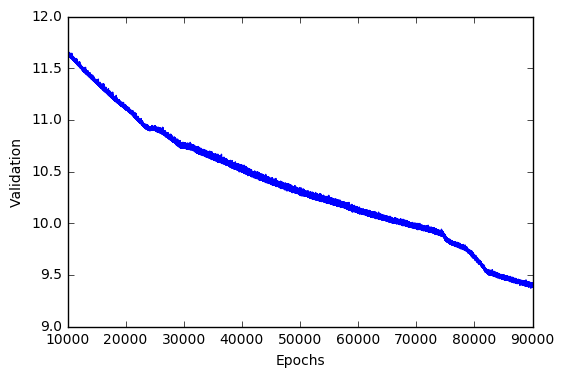

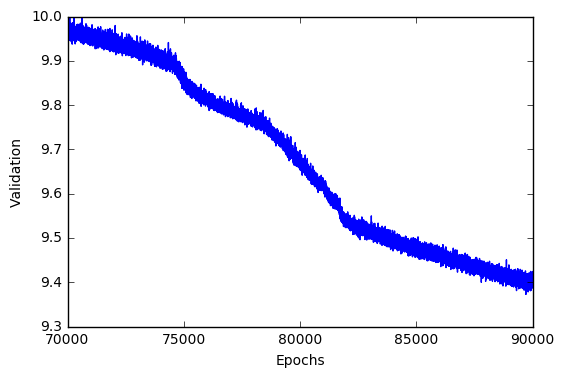

In [27]:
print(all_scores)
average_hist = [np.mean([x[i] for x in all_hist]) for i in range(epocas)]

offset0 = 10000
offset1 = None
smooth_history = average_hist[offset0:offset1]
plt.plot(range(1+offset0, len(smooth_history) + 1 + offset0), smooth_history)
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()

offset0 = 70000
offset1 = None
smooth_history = average_hist[offset0:offset1]#
plt.plot(range(1+offset0, len(smooth_history) + 1 + offset0), smooth_history)
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()

In [25]:
#Entrenar la red con todos los daton hasta la mejor epoca
epocas_optimas = 99000
x_data2 = (x_data - mean) / std

In [26]:
#
model8 = build_model()
model8.fit(x_data2, y_data, epochs=epocas_optimas, batch_size=batch_size, verbose=0)
test_mse_score, test_mae_score = model8.evaluate(x_test, y_test)
print("test_mse_score=%f, test_mae_score=%f" % (test_mse_score, test_mae_score))
y_predicted = model8.predict(x_test)
error = calcError(y_test, y_predicted)
print("CES ERROR: ", error)
print("\n")
beep()

678/678 [==============================] - 0s 507us/step
test_mse_score=61.709418, test_mae_score=5.719725
CES ERROR:  9.137178785632157




In [22]:
#model.save("cesnet_redux_last_"+str(error)+".h5")

In [23]:
len(np.unique(y_data))

3902

In [24]:
no ejecutar!!

#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
#>pip install opencv-python
# No funciona, tienes que bajarte el archivo desde: https://www.python.org/downloads/windows/ y hacer: pip install opencv_python‑3.2.0‑cp36‑cp36m‑win_amd64.whl
#https://stackoverflow.com/questions/43184887/dll-load-failed-error-when-importing-cv2
import cv2
print("OpenCV v", cv2.__version__)
cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

SyntaxError: invalid syntax (<ipython-input-24-0953392099c8>, line 1)

In [ ]:
Ensembling ANN ?!

In [ ]:
#print("x,y,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19")

No ejecutar!!

ann = db.collection(u'ann')
ptos = ann.get()

lista_ptos = []
allmacs = {}
i = -1
wifis = []
for pto in ptos:
    x = pto.get('pos').longitude
    y = pto.get('pos').latitude
    #print(y,x)
    lista_ptos.append({'x': x, 'y': y})
    wifis.append({'x': x, 'y': y})
    i += 1
    for mac in pto.get('wifi'):
        dic = {}
        dic[mac.get('bssid')] = mac.get('level')
        wifis[i]['macs'] = dic
        #
        allmacs[mac.get('bssid')] = mac.get('level')

        #print(mac.get('level'),',', mac.get('bssid'))
    #print(u'{} => {}'.format(pto.id, pto.get('fecha')))
    #print(u'{} => {}     {}'.format(pto.get('pos').longitude, pto.get('pos').latitude, pto.to_dict()))
#print(wifis)

lista_macs = []
cabecera = "x,y,"
for mac, level in allmacs.items():
    lista_macs.append(mac)
    cabecera += mac + ","
#print(cabecera)